---
## **Definition of convolution**
---
Consider some input time signal $f(t)$, output time signal $g(t)$ and system function $w(t)$ such that

\begin{align*}
w[f(t)] = g(t) \, .
\end{align*}

A system maps an input signal $f(t)$ onto an output signal $g(t)$. Thus we define the convolution of $w(t)$ and $f(t)$ as:

\begin{align*}
g(t) &= \int_{-\infty}^{\infty} w(\tau)f(t-\tau)\, d\tau \, .
\end{align*}

Or in standard notation

\begin{align*}
g(t) = f(t) * g(t) \, .
\end{align*}

In the real world all our time series are sampled at some time interval $\Delta$, such that the discrete time series are given by:

\begin{align*}
f_k = f(t_k) = f(k\Delta), && w_k = w(t_k) = w(k\Delta) \, .
\end{align*}

Such that the discrete convolution is expressed as follows:

\begin{align*}
g_n = \left[\sum_{k=-\infty}^\infty f_{n-k}w_k\right]\Delta \, .
\end{align*}

In practice both the input signal and system function are finite and the algorithm ends up becoming an iterative addition of the two arrays. Where the input signal gets reversed. 

Here is an example of a convolution function written by me. The idea behind this function is to run an iterative dot product on a padded array of $f$ such that the ends of the array match the dimensions of the system array.

In [1]:
def myConv(f,w,dt):
    '''
    #######################################
    # Description                         #
    # Computes the convolution of f and w # 
    # through iterative dot product.      #
    #######################################
    # Inputs                              #
    # f: input time signal                #
    # w: system funciton                  #
    # dt: sampling interval               #
    #######################################
    # Outputs                             #
    # convolution np array of size        #
    # len(f) + len(w) - 1                 #
    ####################################### 
    '''
    # Pad the input array for ends to match len(w)
    f = np.pad(f,len(w)-1)
    # Reverse its order
    f = f[::-1]
    # Initialize empty array for convolution
    g = []
    # Iterate through length of system array
    for i in range(len(f)):
        # Select a chunk of padded f array
        fi = f[i:len(w)+i]
        # Check vectors are of same length
        if len(fi) != len(w):
            # Will only break once reach padded section
            break
        # Compute dot product
        gi = np.dot(fi,w)
        # Append dot product
        g.append(gi)
    # Reverse back the order of convolution array
    # and multiply by sampling interval
    return(np.array(g[::-1])*dt)

<h2 align='center'> Code Examples of Convolutions</h2>
<p1> Here we will use two system functions, a heavyside step function and a delta function defined as follows:</p1>

\begin{align*}
H(t) = \begin{cases}
        1 & t \geq 0\\
        0 & t < 0
    \end{cases}\\
\text{and}\\
\delta(t) \begin{cases}
    1 & t = 0\\
    0 & \text{else}
    \end{cases} \, .
\end{align*}

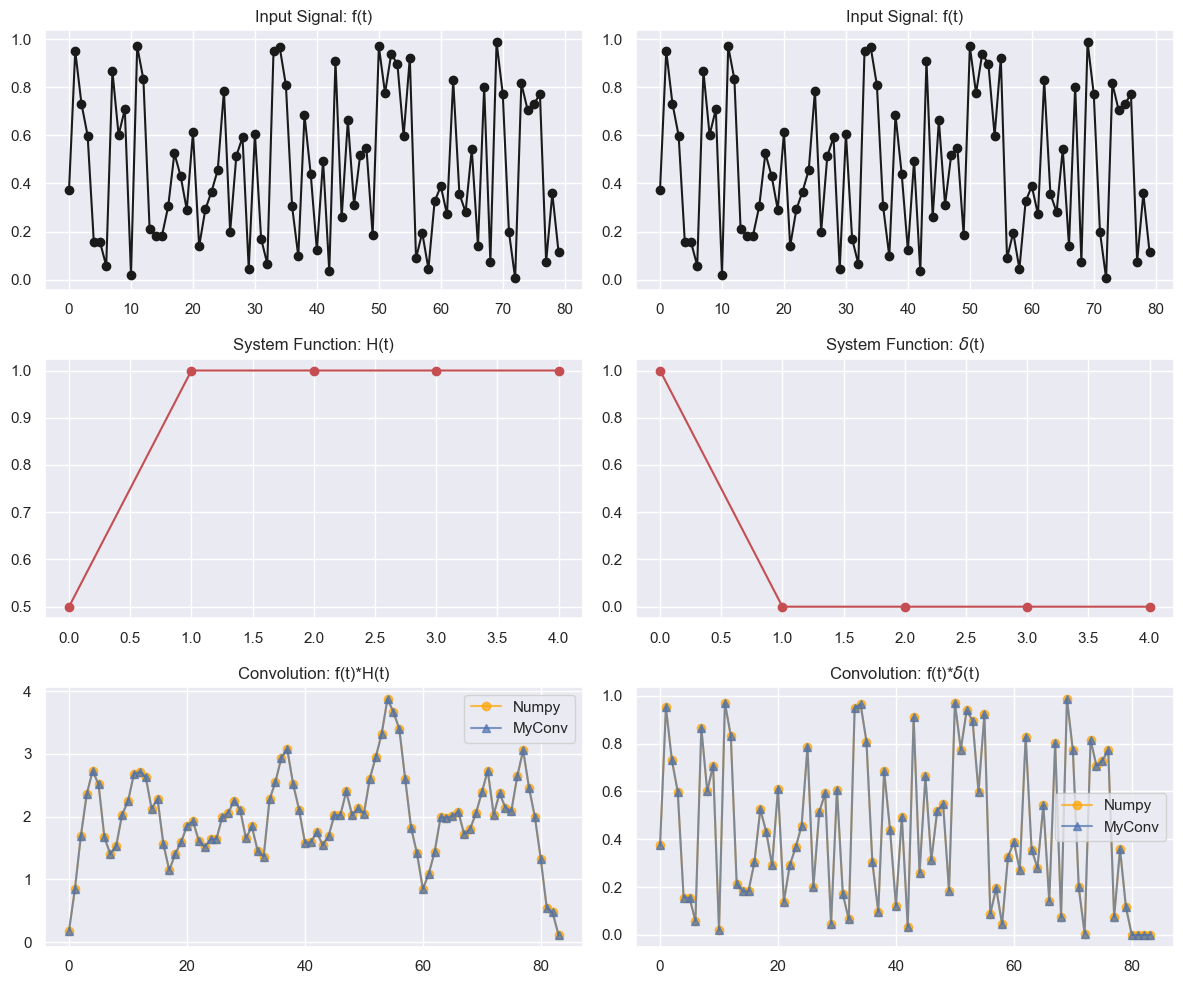

In [18]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Define signal and system function discrete arrays.
np.random.seed(42)
f = np.random.uniform(0,1,size=80)

# Discretize the step function
def discrete_H(N):
    '''Returns a discrete array for H with N elements'''
    h1 = [0.5]
    h2 = np.ones(N-1)
    H = np.concatenate((h1,h2))
    return(H)
# Discretize the delta function
def discrete_delta(N,dt):
    '''Returns a discrete array for delta with N elements and 1/dt as first element'''
    d1 = [1/dt]
    d2 = np.zeros(N-1)
    D = np.concatenate((d1,d2))
    return(D)

# Create step funtion of 5 elements and delta function
w = discrete_H(5)
w2 = discrete_delta(5,1)

# Compute convolution
g = np.convolve(f,w)
g2 = np.convolve(f,w2)
g3 = myConv(f,w,1) # type: ignore
g4 = myConv(f,w2,1) # type: ignore

fig, ax = plt.subplots(figsize=(12,10),nrows=3,ncols=2,gridspec_kw={'height_ratios': [1, 1, 1]})
ax[0][0].plot(np.arange(0,len(f),1),f,marker='o',c='k')
ax[0][0].set_title('Input Signal: f(t)')
ax[1][0].plot(np.arange(0,len(w),1),w,marker='o',c='r')
ax[1][0].set_title('System Function: H(t)')
ax[2][0].plot(np.arange(0,len(g),1),g,marker='o',c='orange',alpha=0.7,label='Numpy')
ax[2][0].plot(np.arange(0,len(g3),1),g3,marker='^',alpha=0.7,label='MyConv')
ax[2][0].set_title('Convolution: f(t)*H(t)')
ax[2][0].legend()

ax[0][1].plot(np.arange(0,len(f),1),f,marker='o',c='k')
ax[0][1].set_title('Input Signal: f(t)')
ax[1][1].plot(np.arange(0,len(w2),1),w2,marker='o',c='r')
ax[1][1].set_title(r'System Function: $\delta$(t)')
ax[2][1].plot(np.arange(0,len(g2),1),g2,marker='o',c='orange',alpha=0.7,label='Numpy')
ax[2][1].plot(np.arange(0,len(g4),1),g4,marker='^',alpha=0.7,label='MyConv')
ax[2][1].set_title(r'Convolution: f(t)*$\delta$(t)')
ax[2][1].legend()
plt.tight_layout()